## Embedding in $d=2$, cycling network

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from neurodyn import *
import matplotlib_tufte
matplotlib_tufte.setup()
from matplotlib_tufte import *

## Sanity checks

simulating LowRankRNN{N=20000, p=2, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:02<00:00]


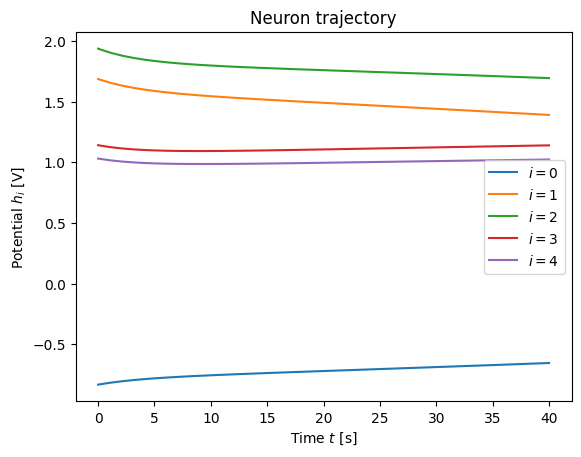

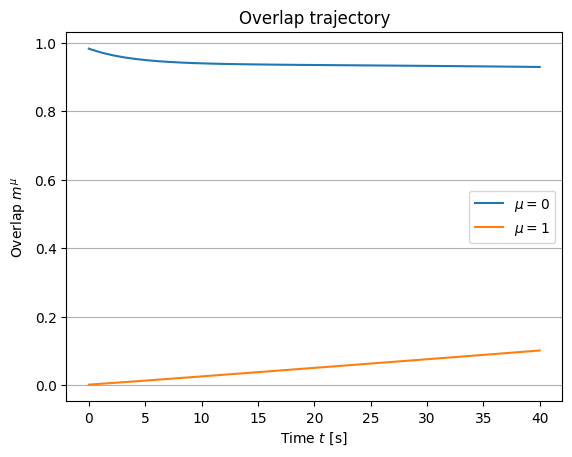

In [3]:
rnn = LowRankRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=0, shift=0, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:02<00:00]


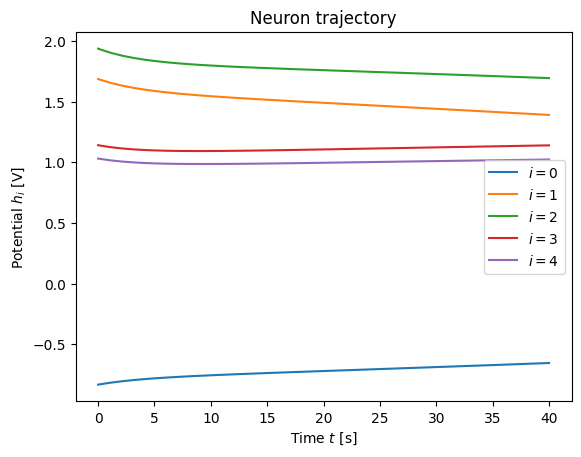

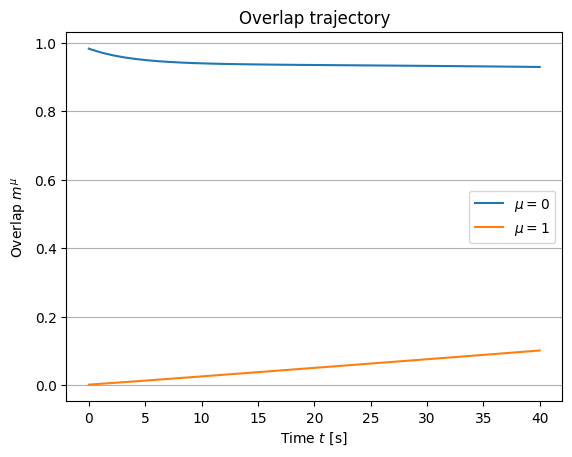

In [4]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=0, shift=0)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=0, shift=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:02<00:00]


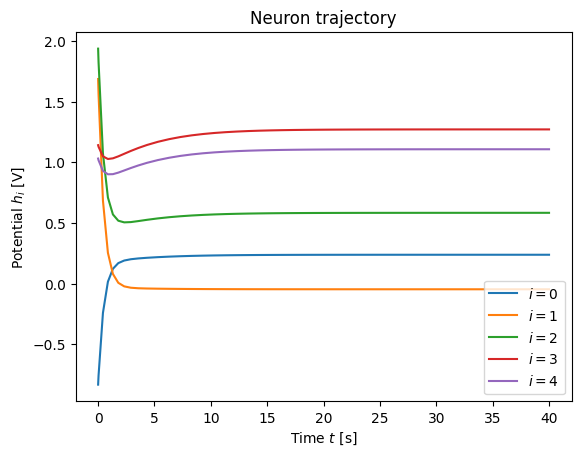

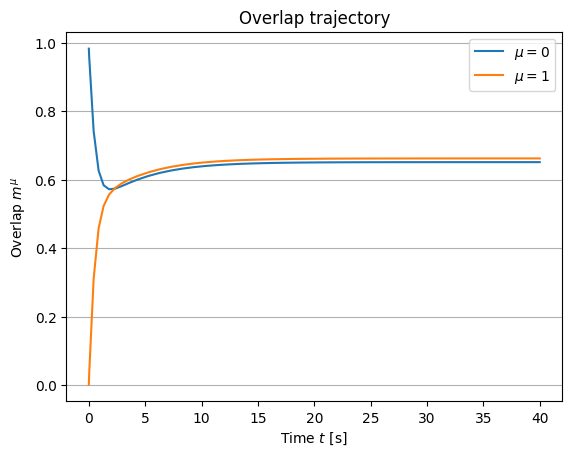

In [5]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=0, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=10, shift=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:03<00:00]


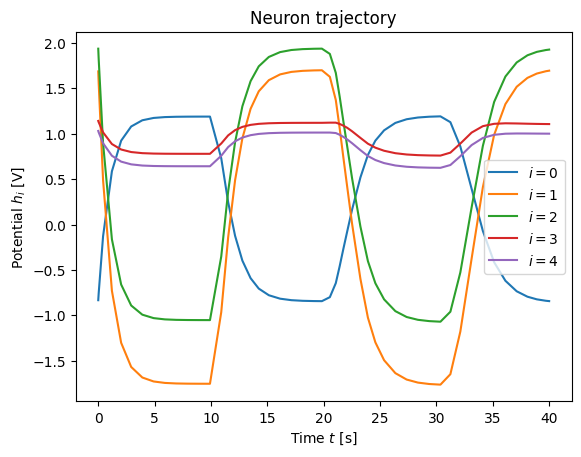

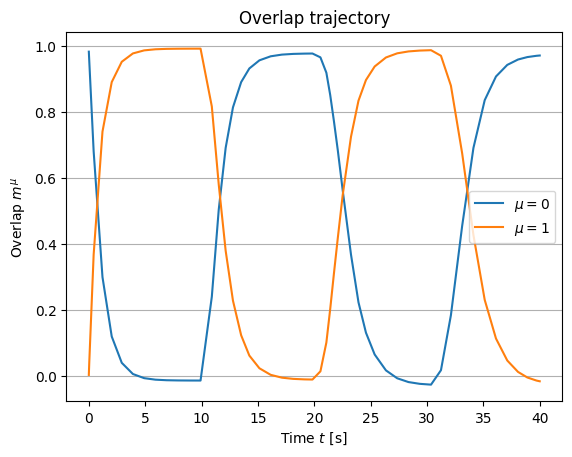

In [6]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=10, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

## Testing different $\delta$ offsets

simulating LowRankCyclingRNN{N=20000, p=2, delta=2, shift=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:07<00:00]


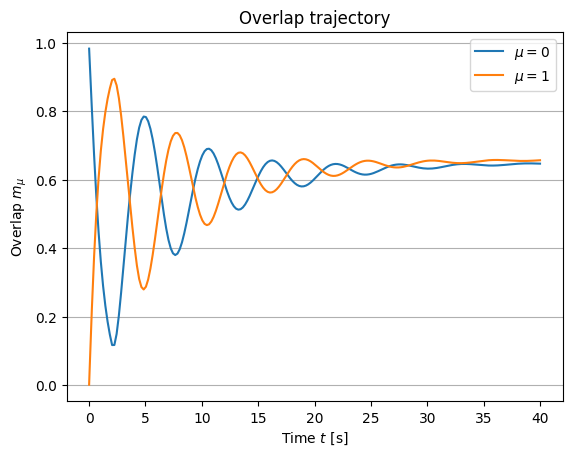

In [3]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=2, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=0.2, progress=True)
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=6, shift=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:05<00:00]


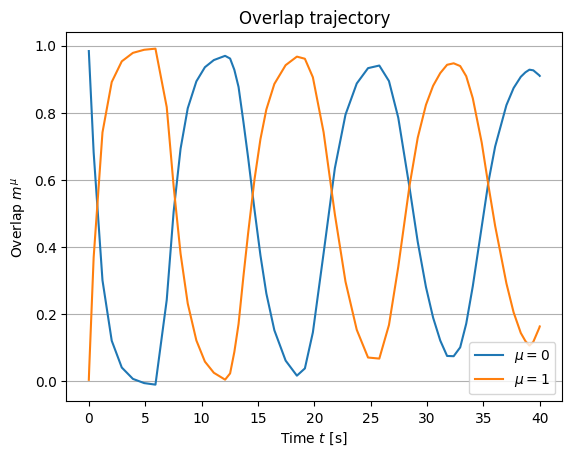

In [10]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=6, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_overlap_trajectory(rnn, res);

simulating LowRankCyclingRNN{N=20000, p=2, delta=10, shift=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:03<00:00]


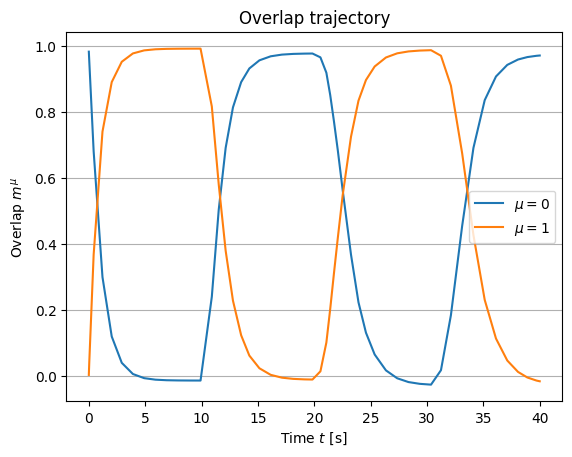

In [11]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=10, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_overlap_trajectory(rnn, res);
# res = rnn.simulate_h(np.concatenate([rnn.F[:rnn.N//2, 0], rnn.F[rnn.N//2:, 1]]), (0, 40), dt_max=1, progress=True)

simulating LowRankCyclingRNN{N=20000, p=2, delta=10, shift=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:03<00:00]


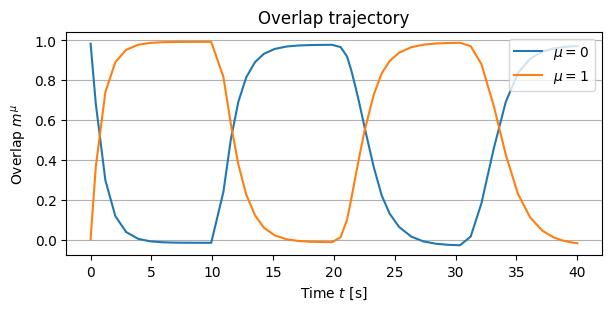

In [12]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=10, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
figax = plot_overlap_trajectory(rnn, res, figax=plt.subplots(figsize=(6, 3), layout='constrained'))
figax[1].legend(loc='upper right')
figax[0].savefig('../presentation/2023-04-20/embedding_d=2_cycling_overlaps.png', transparent=True)

-> it looks like there is some damping, i.e. we expect the cycling to stop after a while

## An intuition for the cycling behavior

With the normal RNN, the activity is aligned with the recurrent currents. Since dh = 0, it is a fixed point.

With the cycling RNN, the activity is rotated by $\pi/2$ wrt the potential

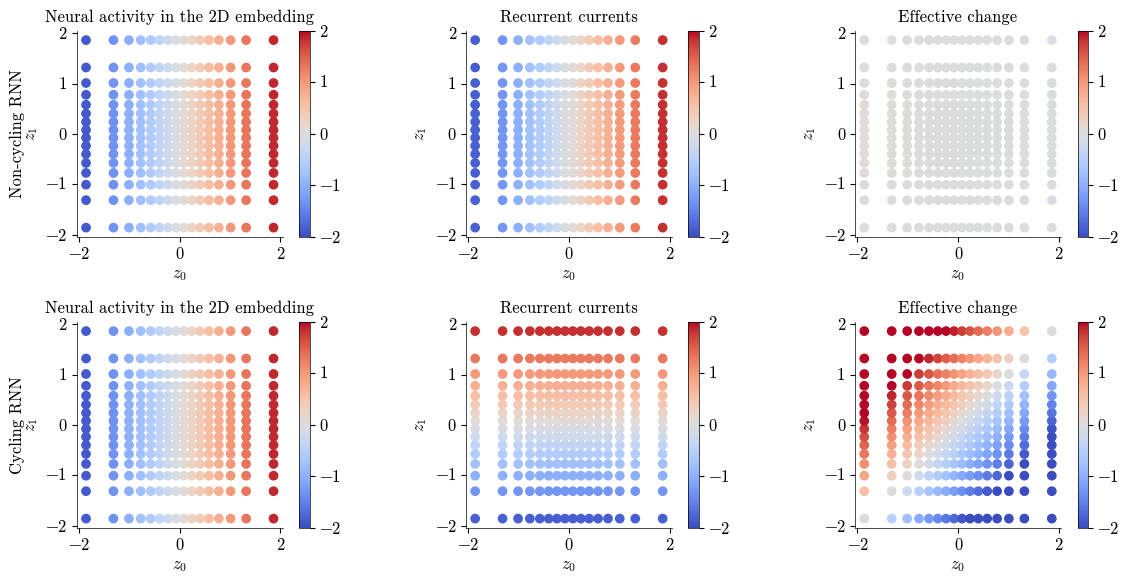

In [11]:
rnn_nocyc = LowRankRNN.new_sampled_valentin(
	phi=sigmoid, mapping_samples=ReshapeMapping.new_nrec(nrec=4).inverse_samples(),
	I_ext=zero, exclude_self_connections=False
)
rnn_cyc = LowRankCyclingRNN.new_sampled_valentin(
	phi=sigmoid, mapping_samples=ReshapeMapping.new_nrec(nrec=4).inverse_samples(),
	I_ext=zero, exclude_self_connections=False, delta=10, shift=1
)
rnn_cyc.h_lagging = lambda t, h: h  # HACK : make the recurrent currents work for t=0

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(3*4, 2*3), layout='tight')

for i, rnn in enumerate([rnn_nocyc, rnn_cyc]):
	axes[i, 0].set_title('Neural activity in the 2D embedding', fontsize='medium')
	axes[i, 0].set_aspect('equal')
	axes[i, 0].set_xlabel('$z_0$')
	axes[i, 0].set_ylabel('$z_1$')
	# breathe(axes[i, 0])
	im = axes[i, 0].scatter(*rnn.F.T, c=rnn.F[:, 0], cmap='coolwarm', vmin=-2, vmax=2)
	fig.colorbar(im, ax=axes[i, 0])
	axes[i, 1].set_title('Recurrent currents', fontsize='medium')
	axes[i, 1].set_aspect('equal')
	axes[i, 1].set_xlabel('$z_0$')
	axes[i, 1].set_ylabel('$z_1$')
	# breathe(axes[i, 1])
	im = axes[i, 1].scatter(*rnn.F.T, c=rnn.I_rec(0, rnn.F[:, 0]), cmap='coolwarm', vmin=-2, vmax=2)
	fig.colorbar(im, ax=axes[i, 1])
	axes[i, 2].set_title('Effective change', fontsize='medium')
	axes[i, 2].set_aspect('equal')
	axes[i, 2].set_xlabel('$z_0$')
	axes[i, 2].set_ylabel('$z_1$')
	# breathe(axes[i, 2])
	im = axes[i, 2].scatter(*rnn.F.T, c=rnn.dh(0, rnn.F[:, 0]), cmap='coolwarm', vmin=-2, vmax=2)
	fig.colorbar(im, ax=axes[i, 2])

add_headers(axes=axes.flat, row_headers=['Non-cycling RNN', 'Cycling RNN'], fontsize='medium')

plt.show()

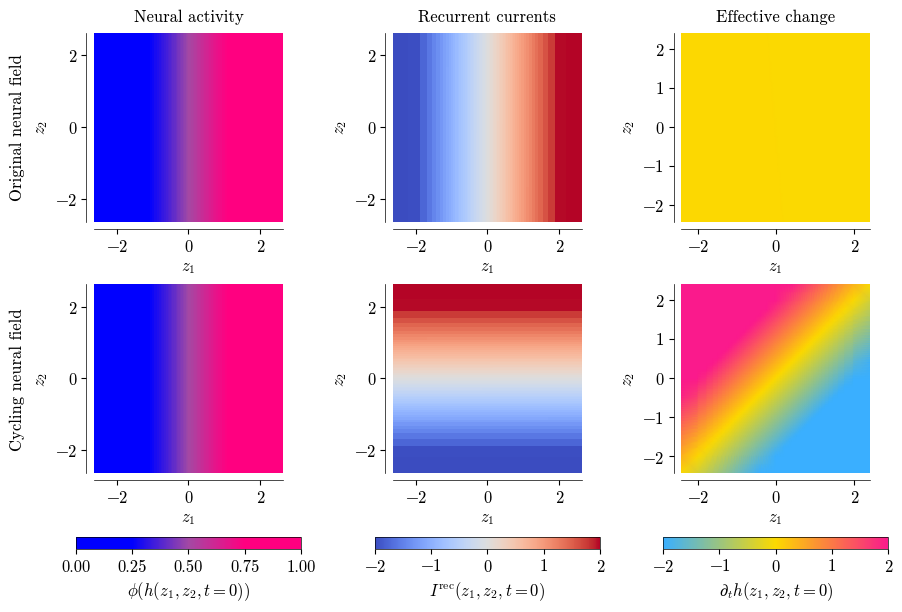

In [5]:
from matplotlib.image import NonUniformImage

nrec = 6
rnn_nocyc = LowRankRNN.new_sampled_valentin(
	phi=sigmoid, mapping_samples=ReshapeMapping.new_nrec(nrec=nrec).inverse_samples(),
	I_ext=zero, exclude_self_connections=False
)
rnn_cyc = LowRankCyclingRNN.new_sampled_valentin(
	phi=sigmoid, mapping_samples=ReshapeMapping.new_nrec(nrec=nrec).inverse_samples(),
	I_ext=zero, exclude_self_connections=False, delta=10, shift=1
)
rnn_cyc.h_lagging = lambda t, h: h  # HACK : make the recurrent currents work for t=0

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(3*4-3, 2*3), layout='constrained')

for i, rnn in enumerate([rnn_nocyc, rnn_cyc]):
	axes[i, 0].set_aspect('equal')
	axes[i, 0].set_xlabel('$z_1$')
	axes[i, 0].set_ylabel('$z_2$')
	shape = (2**nrec, 2**nrec)
	im = axes[i, 0].pcolormesh(
		rnn.F[:, 0].reshape(shape), rnn.F[:, 1].reshape(shape), rnn.phi(rnn.F[:, 0]).reshape(shape),
		cmap=cmap_bi, vmin=0, vmax=1
	)
	breathe(axes[i, 0])
	if i == 1:
		plt.colorbar(im, ax=axes[i, 0], orientation='horizontal', label='$\\phi(h(z_1,z_2, t=0))$')
	
	axes[i, 1].set_aspect('equal')
	axes[i, 1].set_xlabel('$z_1$')
	axes[i, 1].set_ylabel('$z_2$')
	im = axes[i, 1].pcolormesh(
		rnn.F[:, 0].reshape(shape), rnn.F[:, 1].reshape(shape), rnn.I_rec(0, rnn.F[:, 0]).reshape(shape),
		cmap='coolwarm', vmin=-2, vmax=2
	)
	breathe(axes[i, 1])
	if i == 1:
		plt.colorbar(im, ax=axes[i, 1], orientation='horizontal', label='$I^\mathrm{rec}(z_1, z_2, t=0)$')

	axes[i, 2].set_aspect('equal')
	axes[i, 2].set_xlabel('$z_1$')
	axes[i, 2].set_ylabel('$z_2$')
	im = axes[i, 2].pcolormesh(
		rnn.F[:, 0].reshape(shape), rnn.F[:, 1].reshape(shape), rnn.dh(0, rnn.F[:, 0]).reshape(shape),
		cmap=cmap_pan, vmin=-2, vmax=2, shading='gouraud'
	)
	breathe(axes[i, 2])
	if i == 1:
		plt.colorbar(im, ax=axes[i, 2], orientation='horizontal', label='$\partial_t h(z_1, z_2, t=0)$')

add_headers(axes=axes.flat, row_headers=['Original neural field', 'Cycling neural field'], fontsize='medium', row_pad=8)
add_headers(axes=axes.flat, col_headers=['Neural activity', 'Recurrent currents', 'Effective change'], fontsize='medium', col_pad=8)

plt.show()

## Make animations

simulating LowRankCyclingRNN{N=20000, p=2, delta=6, shift=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=60.000 of 60 [00:06<00:00]


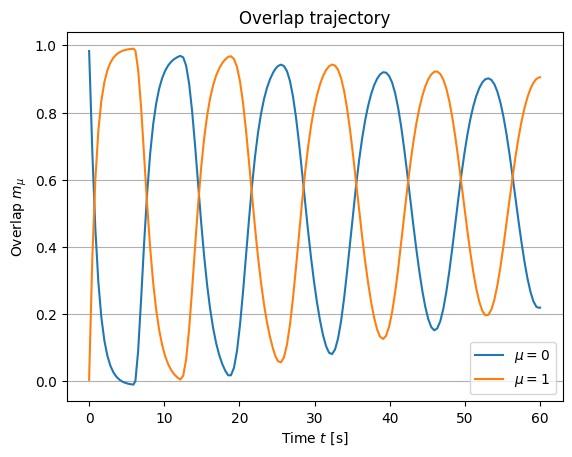

In [4]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=6, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 60), dt_max=0.4, progress=True, cache=True)
plot_overlap_trajectory(rnn, res);

In [28]:
animate2d(rnn, res, 'animations/embedding_d=2_h0=0_cycling_delta=6.mp4', Nmax=5000)

100%|██████████| 155/155 [01:06<00:00,  2.34it/s]
